# Dataset Analysis: "60,000+ Chess Game Dataset (Chess.com)"

## Author

Analysis by Ivan Lamparelli

Written in October 2021

## Dataset description

The dataset gathers information regarding chess games on the [Chess.com](https://www.chess.com/) platform. 

The dataset has been retrieved from [Kaggle](https://www.kaggle.com/adityajha1504/chesscom-user-games-60000-games). It's composed of a 160MB .csv file, which contains 14 columns and 66.879 rows.

Each row is related to a single game, and contains data like:
- username and ELO score of both players
- which player has won
- type of victory/draw (i.e. victory by checkmate or time)
- time format
- game format
- game FEN and PGN

## Analysis goals

The initial questions I've planned to respond to when starting this analysis are the following:
- How is ELO distributed among players?
- Do white players win more than black players due to first move advantage? Is this more influent at high or low ELO ranges? 
- What are the most common opening moves? 
- How do openings change at different ELO ranges?
- How many turns is an average game?
- How does the time format influence the number of turns and the piece advantage between players?
- Do high ELO players end the game with a lower or higher piece advantage on average?
- What are the most common result types overall (i.e. win by checkmate, win by timeout, draw by stalemate, etc)? Are these influenced by ELO and time format?

Further questions may emerge during the analysis depending on what I discover.

## Project setup

### Github Repository

The project has been tracked with Git and is hosted on GitHub. The repository can be explored on [my project's GitHub page](https://github.com/lamparelli/chess-data-analysis).

### Project libraries

In [972]:
import pandas as pd
import seaborn as sns
import matplotlib as pltlib
import matplotlib.pyplot as plt
import os

### Dataset import

In [973]:
# I've used the OS path separator to ensure the code would work both on Windows and Unix environments
games = pd.read_csv("data" + os.path.sep + "club_games_data.csv")

## Data exploration

To begin the analysis, we'll perform a basic exploration of the data types and missing values.

After the manipulation phase, we'll perform further exploration and visualization of the data.

### Dataset structure

In [974]:
print("Dataset columns:")
print(list(games.columns))
print("Number of columns: ", games.columns.size)
print("Number of rows: ", len(games))

Dataset columns:
['white_username', 'black_username', 'white_id', 'black_id', 'white_rating', 'black_rating', 'white_result', 'black_result', 'time_class', 'time_control', 'rules', 'rated', 'fen', 'pgn']
Number of columns:  14
Number of rows:  66879


### Sample data

In [975]:
# To see all the table columns, execute the code or read the html version of the document; The pdf version will truncate the table 
games.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


The nature of the content in most columns is pretty clear:
- white_username and black_username: players usernames
- white_id and black_id: players unique IDs
- white_rating and black_rating: players ELO scores
- white_result and black_result: contain information regarding the game result
- time_class: game time category
- rated: whether a game is rated or not
- FEN: FEN notation of the game (indicates the last position of the game)

Three columns require further exploration:
- time_control: How is the data written? I.E. what does `1/172800` mean?
- rules: Each row in the sample data contains "chess" for this column. What does "chess" mean in this context?
- PGN: Why doesn't the sample data show PGN notations?

### Data format of the time_control column

In [976]:
# Possible values for the time_control column
print(list(games["time_control"].unique()))

['1/259200', '1/172800', '1800', '1/86400', '1/432000', '1/604800', '600', '120+1', '900+10', '300', '180+2', '3600+5', '2700+45', '3600', '1/1209600', '180', '600+10', '60', '480+3', '300+5', '420+3', '600+5', '600+2', '1200', '30', '60+1', '120', '1500+3', '900+2', '1500+5', '1500+10', '1/864000', '900', '300+2', '1500', '7200', '300+1', '5400', '3600+60', '2700+30', '3480+45', '10', '2700+10', '15', '2700', '3600+20', '4500', '4200', '900+5', '1800+10', '2700+5', '480+5', '1800+30', '300+3', '600+1', '1800+5', '420+5', '5400+30', '240+10', '420', '303', '60+10']


There are 3 types of data in the time_control column:
- strings with 1/a_number
- strings with a number
- strings with a number + another_number

By having domain knowledge, a plausible hypotesis is that:
- strings with a fraction represent games with a daily per-move timer
- strings without a fraction represent games with a total per-game timer (with those with a "+" having a Fischer bonus increment after each move)

Let's check this hypotesis

In [977]:
print("Types of games with a time_control value with a fraction: ", list(games[games["time_control"].str.contains("/")]["time_class"].unique()))
print("Types of games with a time_control value without a fraction: ", list(games[~games["time_control"].str.contains("/")]["time_class"].unique()))

Types of games with a time_control value with a fraction:  ['daily']
Types of games with a time_control value without a fraction:  ['rapid', 'bullet', 'blitz']


As we guessed, the slash represents games with a daily time format. The other types of time_control data represent per-game timers. 

### Data format of the rules column

In [978]:
# Possible values for the rules column
print(games["rules"].unique())

['chess' 'chess960' 'threecheck' 'crazyhouse' 'kingofthehill']


The rules column indicates whether the game followed traditional chess rules or chess variants

### Data format of the PGN column

In [979]:
# Sample data in the PGN column
print(games.loc[0, "pgn"])

[Event "Enjoyable games 2 - Round 1"]
[Site "Chess.com"]
[Date "2013.01.30"]
[Round "-"]
[White "-Amos-"]
[Black "miniman2804"]
[Result "1-0"]
[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]
[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]
[Timezone "UTC"]
[ECO "E22"]
[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]
[UTCDate "2013.01.30"]
[UTCTime "16:35:14"]
[WhiteElo "1708"]
[BlackElo "1608"]
[TimeControl "1/259200"]
[Termination "-Amos- won by checkmate"]
[StartTime "16:35:14"]
[EndDate "2013.02.01"]
[EndTime "18:14:48"]
[Link "https://www.chess.com/game/daily/64629816"]

1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0



The PGN column contains nested data. During the data manipulation phase, we'll extract these data.

### Missing values

#### Number of NA values

We can check the number of NA values per column by using `isna().sum()`.

Then we can count the total number of NA values in the dataset by summing the NA values in each group.

In [980]:
print("NA values: ", games.isna().sum().sum())

NA values:  0


There are no NA values in the dataset.

#### Number of empty strings

To check for missing values expressed as empty strings, first we must manipulate the dataset by trimmming initial and ending spaces in string values.

We can achieve this by the `strip()` function to each column that contains strings.

In [981]:
games = games.applymap(lambda colData: colData.strip() if isinstance(colData, str) else colData)

We can then transform empty strings into NA values.

In [982]:
games = games.replace("", pd.NA)

Now we check again for NA values.

In [983]:
print("Empty strings: ", games.isna().sum().sum())

Empty strings:  0


There are no empty strings in the dataset.

## Data manipulation

After an initial exploration of the data structure, I've set an initial list of manipulations I want to perform on the raw data to prepare for the analysis:
- Determine if we can drop the player id columns
- Extract the minutes information from the time_control column
- Extract the winning player and game result type from the white_result and black_result columns
- Extract piece advantage, point advantage, number of turns at end of game from the FEN column
- Extract game date and opening info from the PGN column

### Players manipulation

#### Checking username uniqueness

We want to determine whether we can remove the white_id and black_id columns. In order to do so, we must check whether there are players with different IDs that have the same username.

A single player (identified by id) could be present both in the white_id and black_id columns, if he has played sometimes as black and other times as white. So, the first step is identifying the unique players by id, then we can check for duplicate usernames.

In [984]:
# Extracts id and username of every white/black player
whitePlayers = games[["white_id", "white_username"]]
blackPlayers = games[["black_id", "black_username"]]

# Renames the columns with equal names in order to join them
whitePlayers = whitePlayers.rename(columns={"white_id": "id", "white_username": "username"})
blackPlayers = blackPlayers.rename(columns={"black_id": "id", "black_username": "username"})

# Joins the id and username of every player in a single dataframe (to then identify unique players)
players = pd.concat([whitePlayers, blackPlayers])

# Identifies unique players
players.drop_duplicates(subset=["id"], inplace=True)

# Prints the number of duplicated usernames
numOfPlayerByUsername = players["username"].value_counts()
print("Duplicated usernames: ", numOfPlayerByUsername[numOfPlayerByUsername > 1].size)

Duplicated usernames:  0


#### Removing redundant data

After having determined that usernames are valid unique identifiers, we can drop the winner_id and loser_id columns.

In [985]:
games.drop(columns=["white_id", "black_id"], inplace=True)
print(list(games.columns))

['white_username', 'black_username', 'white_rating', 'black_rating', 'white_result', 'black_result', 'time_class', 'time_control', 'rules', 'rated', 'fen', 'pgn']


### Time_control manipulation

We want to transform the qualitative information on time format into quantitative information, by reading the number of minutes available in a game to think.

Ideally, we need to divide this information in two groups (per_move_time per_game_time), since analyzing these two different categories as a single unit could be misleading.

So, we'll add two new columns:
- time_type (per_move / per_game)
- timer_minutes

In [986]:
# Daily games
perMoveTimer = "per_move"

# All other types of games
perGameTimer = "per_game"

# Extract timer type
games["time_type"] = games["time_class"].apply(lambda time: perMoveTimer if time == "daily" else perGameTimer)

# Extract timer minutes
def getTimerMinutes(game):
    seconds = pd.NA
    if (game["time_type"] == perGameTimer):
        seconds = int(game["time_control"].split("+")[0])
    elif (game["time_type"] == perMoveTimer):
        seconds = int(game["time_control"].split("/")[1])
    else:
        return pd.NA
    return int(seconds / 60) 

games["timer_minutes"] = games.apply(lambda game: getTimerMinutes(game), axis=1)
games["timer_minutes"]


0        4320
1        2880
2        2880
3        2880
4        2880
         ... 
66874       5
66875       5
66876       5
66877       5
66878       5
Name: timer_minutes, Length: 66879, dtype: int64

### Game results manipulation

Currently, the types of game result are divided between two columns (white_result and black_result):
- for drawn games: both white_result and black_result contain the type of draw
- for won games: if white won, white_result contains the word `win` and black_result contains the type of victory; viceversa if black won

This structure is unfit for exploring the different game result types. We'll proceed to extract two new columns:
- winner: white, black, neither (in case of draw)
- result type: the win/draw cause (i.e. victory by checkmate, victory by timeout, draw by stalemate, etc.)

#### Extracting winning player

In [987]:
# Defined constants to avoid using hardwired strings in code
winnerInCaseOfDraw = "neither"
winResult = "win"
whitePlayer = "white"
blackPlayer = "black"

# Sets a unique column with the information on who won
games["winner"] = winnerInCaseOfDraw
games.loc[games["white_result"] == winResult, "winner"] = whitePlayer
games.loc[games["black_result"] == winResult, "winner"] = blackPlayer

print("Sample mapping of the winner column:")
print(games[["white_result", "black_result", "winner"]].head())

Sample mapping of the winner column:
  white_result black_result winner
0          win   checkmated  white
1          win     resigned  white
2          win     resigned  white
3   checkmated          win  black
4          win     resigned  white


#### Extracting game result type

In [988]:
# Defines how to read the result type from each game
def getResultType(game):
    return game["black_result"] if game["winner"] == whitePlayer else game["white_result"]

# Sets the result type in a new column
games["result_type"] = games.apply(lambda game: getResultType(game), axis=1)

print("Sample mapping of the new columns:")
print(games[["white_result", "black_result", "winner", "result_type"]].head())

Sample mapping of the new columns:
  white_result black_result winner result_type
0          win   checkmated  white  checkmated
1          win     resigned  white    resigned
2          win     resigned  white    resigned
3   checkmated          win  black  checkmated
4          win     resigned  white    resigned


#### Dropping old columns

In [989]:
games.drop(columns=["white_result", "black_result"], inplace=True)
print("Columns: ", list(games.columns))

Columns:  ['white_username', 'black_username', 'white_rating', 'black_rating', 'time_class', 'time_control', 'rules', 'rated', 'fen', 'pgn', 'time_type', 'timer_minutes', 'winner', 'result_type']


### FEN data manipulation

#### Hints about FEN notation

A FEN string contains 6 pieces information (separated by spaces) regarding a particular state of the board, in the format:

`board_setup next_player castling_options en_passant_options number_of_moves_since_last_capture number_of_turns`

Example: 

`r2qk2r/1pp2ppp/p3pn2/1b6/2NP4/8/PP1BQPPP/R4RK1 b kq - 1 15`

The main interest of the analysis regarding this data is in the piece and points advantage (readable from the board setup) and the number of turns. We'll proceed to extract these pieces of information first. 

#### Hints about board setup in FEN notation

The board setup is represented as a series of information on the board rows:
- each row is separated by a slash
- each row is represented as a series of letters and numbers (a letter is a piece, a number is a set of adiacent empty spaces)
- K is King, Q is Queen, R is rook, N is knight, B is bishop, P is pawn
- white pieces are in uppercase, black pieces are in lowercase

Example:

`r2qk2r/1pp2ppp/p3pn2/1b6/2NP4/8/PP1BQPPP/R4RK1`

#### Hints about piece and points advantage

Each player start with 16 pieces. Each piece has a different score, which is used to evaluate which player has an advantage in material:
- king: no score (since it can't be captured, it can only be checkmated)
- queen: 9 points
- rook: 5 points
- bishop: 3 points
- knight: 3 points
- pawn: 1 point

Sometimes the two players have the same total score in terms of points, but one of them has a higher number of pieces (pieces with a smaller score). This can mean occupying more phisical squares on the board, which, according to chess litetature, can be an important factor during the endgame (the ending phase of the game).

Part of the analysis goals is understanding how differences in terms of available pieces and point advantage reflect on winrates.

#### How to extract info from FEN notation

Each piece of information is separated by a space. We could simply extract different pieces by using the `split()` function, like this:

In [990]:
sampleFenString = "r2qk2r/1pp2ppp/p3pn2/1b6/2NP4/8/PP1BQPPP/R4RK1 b kq - 1 15"
sampleFenString.split()

['r2qk2r/1pp2ppp/p3pn2/1b6/2NP4/8/PP1BQPPP/R4RK1', 'b', 'kq', '-', '1', '15']

But this wouldn't give us control on data validity. By using regular expressions to extract the data, we can ensure that there's no invalid data.

In [991]:
# Each piece of info is enclosed in a capture group (parenthesis) so that we can then extract them

# A single row can contain 1 to 8 values, letters or number
# A letter indicates a pieces
# A number indicates the adiacent empty spaces to the right (there can be max 8 spaces, in which case it's an empty row) 
rowBoardRegex = "[rnbqkpRNBQKP1-8]{1,8}"

# There are 8 rows. Each row (except the last one) has a slash to the right
boardRegex = "(" + ((rowBoardRegex + "/") * 7) + rowBoardRegex + ")"

# Either white or black
nextPlayerRegex = "(w|b)"

# Shows availability of kingside/queenside castling for white and black; If there are no available options, there's a dash 
castlingRegex = "([KQkq]{1,4}|-)"

# Shows square coordinates where the next player can move en passant (or a dash if there is no en passant move)
enPassantRegex = "([a-h][[1-8]|-)"

# Number
movesSinceLastCaptureRegex = "([0-9]+)"

# Number
numberOfTurnsRegex = "([0-9]+)"

# Joins the different controls to create the regex for the FEN strings
fenRegex = " ".join([boardRegex, nextPlayerRegex, castlingRegex, enPassantRegex, movesSinceLastCaptureRegex, numberOfTurnsRegex])

# Sets symbols ^ and $ to specify start and end of string
fenRegex = "^" + fenRegex + "$"

#### Examining FEN data validity

In [992]:
# Checks for every game if the FEN data is valid
games["fen_check"] = games["fen"].str.extract(fenRegex)[0]
print("Number of games with invalid FEN data: ", games["fen_check"].isna().sum())

Number of games with invalid FEN data:  64934


We can see that a lot of games have invalid FEN data. Let's explore the issue by checking a sample of invalid data.

In [993]:
# Sample of invalid data
games[games["fen_check"].isna()]["fen"].head(3)

11                         8/8/8/8/8/8/1kp5/3K4 w - -
19                         8/8/8/8/8/5K2/6Q1/7k b - -
20    1r4k1/pbq2p1p/2P1p1p1/1Q6/8/6P1/P4PBP/6K1 b - -
Name: fen, dtype: object

As explained in the hints on FEN, a complete FEN string has 6 pieces of data separated by spaces. We can see that, in the sample of invalid data, there are only 4 pieces of information. 

Part of the FEN strings are missing the last 2 pieces of information (number of turns since last capture, number of turns).

This means that:
- the FEN column can't be used reliably to read the number of turns
- the regex needs to be slightly altered to consider optionality of the last 2 parameters

In [994]:
# Fixed regex with last 2 parameters set as optional
fenRegex = "^" + boardRegex + " " + nextPlayerRegex + " " + castlingRegex + " " + enPassantRegex + \
    "( " + movesSinceLastCaptureRegex + " " + numberOfTurnsRegex + "){0,1}"

# Checks for every game if the FEN data is valid
games["fen_check"] = games["fen"].str.extract(fenRegex)[0]
print("Number of games with invalid FEN data: ", games["fen_check"].isna().sum())

Number of games with invalid FEN data:  28


In [995]:
# Sample of invalid data
pd.set_option('display.max_colwidth', None) # Sets a higher column width to show the entirety of the data
print(games[games["fen_check"].isna()][["fen", "fen_check"]].head(3))
pd.reset_option('display.max_colwidth')

                                                            fen fen_check
651             8/5kbR/3r1p2/P1pPp1p1/r5P1/8/8/3R1K2 w D - 4 34       NaN
664      1kn2r1n/4p1pp/2B5/1pP2p2/7q/2Q3N1/3K2P1/3R4 w f - 0 27       NaN
671  rkbbnrqn/pppppppp/8/8/8/3P4/PPP1PPPP/RKBBNRQN b FQfq - 0 1       NaN


Another error that some of the FEN strings present, as we can see in the sample, is having invalid characters like `D` and `F` in the castling parameter.

Given that the most important piece of information we want to extract is the board setup (to calculate the piece and points advantage), let's change approach and check whether all the FEN strings contain valid board setups.

In [996]:
games.drop(columns=["fen_check"], inplace=True)

#### Extracting board setup

In [997]:
games["fen_board_setup"] = games["fen"].str.extract(boardRegex)[0]

print("Number of games with invalid board information: ", games["fen_board_setup"].isna().sum())

Number of games with invalid board information:  0


In [998]:
print("Sample board setups:")
print(games["fen_board_setup"].head(3))

Sample board setups:
0        r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R
1                    8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2
2    rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...
Name: fen_board_setup, dtype: object


#### Extracting number of pieces

To calculate the piece and points advantage, first we need to count how many pieces each player has remaining.

In [999]:
# Counts white pieces
games["white_pieces_kings"] = games["fen_board_setup"].str.count("K")
games["white_pieces_queens"] = games["fen_board_setup"].str.count("Q")
games["white_pieces_rooks"] = games["fen_board_setup"].str.count("R")
games["white_pieces_knights"] = games["fen_board_setup"].str.count("N")
games["white_pieces_bishops"] = games["fen_board_setup"].str.count("B")
games["white_pieces_pawns"] = games["fen_board_setup"].str.count("P")

# Counts black pieces
games["black_pieces_kings"] = games["fen_board_setup"].str.count("k")
games["black_pieces_queens"] = games["fen_board_setup"].str.count("q")
games["black_pieces_rooks"] = games["fen_board_setup"].str.count("r")
games["black_pieces_knights"] = games["fen_board_setup"].str.count("n")
games["black_pieces_bishops"] = games["fen_board_setup"].str.count("b")
games["black_pieces_pawns"] = games["fen_board_setup"].str.count("p")

# Counts totals
games["white_pieces"] = games.loc[:, "white_pieces_kings":"white_pieces_pawns"].sum(axis=1)
games["black_pieces"] = games.loc[:, "black_pieces_kings":"black_pieces_pawns"].sum(axis=1)

# Sample data
sampleGame = games.iloc[0, :]
print("Sample comparison between FEN board and number of pieces:")
print(sampleGame["fen_board_setup"])
print("White kings: ", sampleGame["white_pieces_kings"])
print("White queens: ", sampleGame["white_pieces_queens"])
print("White rooks: ", sampleGame["white_pieces_rooks"])
print("White knights: ", sampleGame["white_pieces_knights"])
print("White bishops: ", sampleGame["white_pieces_bishops"])
print("White pawns: ", sampleGame["white_pieces_pawns"])

Sample comparison between FEN board and number of pieces:
r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R
White kings:  1
White queens:  0
White rooks:  2
White knights:  0
White bishops:  1
White pawns:  6


#### Examining pieces data validity

Each player in chess has with 1 king and 16 pieces. The game can't end with a player having zero pieces (since the king can't be captured but only checkmated). 

Let's check these parameters to ensure the integrity of the data related to players pieces.

In [1000]:
gamesWith16PlusPieces = games[(games["white_pieces"] > 16) | (games["black_pieces"] > 16)]
print("Number of games with at least one player with more than 16 pieces: ", len(gamesWith16PlusPieces))

gamesWithLessThan1Piece = games[(games["white_pieces"] < 1) | (games["black_pieces"] < 1)]
print("Number of games with at least one player with less than 1 piece: ", len(gamesWithLessThan1Piece))

gamesWithInvalidKings = games[(games["white_pieces_kings"] != 1) | (games["black_pieces_kings"] != 1)]
print("Number of games with more/less than 1 king per player: ", len(gamesWithInvalidKings))

Number of games with at least one player with more than 16 pieces:  26
Number of games with at least one player with less than 1 piece:  0
Number of games with more/less than 1 king per player:  0


We can see that some games have at least one player with more than 16 pieces. This could be due to either non-traditional chess rules or invalid FEN data.

Let's explore this potential error.

In [1001]:
list(gamesWith16PlusPieces["rules"].unique())

['crazyhouse']

Every game that has a player with more than 16 pieces is in the `crazyhouse` rules format. In this chess variant, a player can either move as you would normally, or place on the board one of the pieces that you captured. 

This explains the data.

#### Extracting piece advantage

Now we'll calculate the difference in number of pieces between the winner and the loser. 
If the number is negative, it means that the winner has won with less pieces remaining than the loser.

In [1002]:
# Can be used to calculate points or pieces advantage by passing the desired column name
def getAdvantage(game, columnName):
    return (game["white_" + columnName] - game["black_" + columnName]) \
        * (1 if game["winner"] == whitePlayer else -1) # If White has won, we calculate normally; otherwise, we flip the result

games["piece_advantage"] = games.apply(lambda game: getAdvantage(game, "pieces"), axis=1)

# Sample data
print("Sample piece advantage data:")
print(games[["winner", "white_pieces", "black_pieces", "piece_advantage"]].head(3))

Sample piece advantage data:
  winner  white_pieces  black_pieces  piece_advantage
0  white            10            11               -1
1  white             7             5                2
2  white            14            13                1


#### Extracting points advantage

Now we'll calculate the difference in pieces points between the winner and the loser.
If the number is negative, it means that the winner has won with a weaker set of pieces than the loser.

In [1003]:
def getPoints(game, player):
    return game[player + "_pieces_queens"] * 9 + game[player + "_pieces_rooks"] * 5 + \
    game[player + "_pieces_knights"] * 3 + game[player + "_pieces_bishops"] * 3 + game[player + "_pieces_pawns"] * 1

games["white_points"] = games.apply(lambda game: getPoints(game, whitePlayer), axis=1)
games["black_points"] = games.apply(lambda game: getPoints(game, blackPlayer), axis=1)
games["points_advantage"] = games.apply(lambda game: getAdvantage(game, "points"), axis=1)

# Sample data
sampleGame = games.iloc[0, :]
print ("Sample point calculation: ")
print("White points: ", sampleGame["white_points"])
print("White queens: ", sampleGame["white_pieces_queens"], " * 9 points each")
print("White rooks: ", sampleGame["white_pieces_rooks"], " * 5 points each")
print("White knights: ", sampleGame["white_pieces_knights"], " * 3 points each")
print("White bishops: ", sampleGame["white_pieces_bishops"], " * 3 points each")
print("White pawns: ", sampleGame["white_pieces_pawns"], " * 1 point each")

print("\nSample points advantage data:")
print(games[["winner", "white_points", "black_points", "points_advantage"]].head(3))

Sample point calculation: 
White points:  19
White queens:  0  * 9 points each
White rooks:  2  * 5 points each
White knights:  0  * 3 points each
White bishops:  1  * 3 points each
White pawns:  6  * 1 point each

Sample points advantage data:
  winner  white_points  black_points  points_advantage
0  white            19            22                -3
1  white            16             8                 8
2  white            37            36                 1


### PGN column manipulation

As seen in the initial data exploration, the PGN column contains nested data.

In [1004]:
# Sample data
print(games.loc[0, "pgn"])

[Event "Enjoyable games 2 - Round 1"]
[Site "Chess.com"]
[Date "2013.01.30"]
[Round "-"]
[White "-Amos-"]
[Black "miniman2804"]
[Result "1-0"]
[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]
[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]
[Timezone "UTC"]
[ECO "E22"]
[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]
[UTCDate "2013.01.30"]
[UTCTime "16:35:14"]
[WhiteElo "1708"]
[BlackElo "1608"]
[TimeControl "1/259200"]
[Termination "-Amos- won by checkmate"]
[StartTime "16:35:14"]
[EndDate "2013.02.01"]
[EndTime "18:14:48"]
[Link "https://www.chess.com/game/daily/64629816"]

1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0


Some of the data in it (i.e. white/black ELO, termination cause, etc.) are redundant with other columns in the dataset. Other pieces of data are less interesting from an analysis standpoint (i.e. timezone, url link to game information).

The two pieces of data we're interested in extracting are:
- game date (to perform analysis on dates)
- opening ECO (to perform analysis on moves)

First thing we'll do is renaming the PGN column into a less ambiguous name, since it doesn't contain (only) PGN information.

In [1005]:
games.rename(columns={"pgn": "game_information"}, inplace=True)

#### Extracting game date

We'll use a regular expression to extract the game date from the game_information column, looking for the values contained within the [Date] tag.

In [1006]:
# A date in the game_information column is composed as year.month.day
dateStringRegex = "[0-9]{4}\.[0-9]{2}\.[0-9]{2}"
# The date is contained in a tag in the structure [Date "my_date"]
# We only want the my_date part, so we put it in a capture group (in parenthesis)
dateFieldRegex = "\[Date \"(" + dateStringRegex + ")\"\]"

games["game_date"] = games["game_information"].str.extract(dateFieldRegex)[0]

# Sample data
print("Number of games with invalid date information: ", games["game_date"].isna().sum())
print("Sample dates:")
print(games["game_date"].head(3))

Number of games with invalid date information:  0
Sample dates:
0    2013.01.30
1    2013.01.19
2    2013.02.01
Name: game_date, dtype: object


#### Extracting ECO opening code

ECO (Encyclopaedia of Chess Opening) codes are codes that uniquely identify common chess opening moves. 

An ECO code is composed of:
- a letter, from A to E, representing the opening category
- a two-digits number, that uniquely identifies the opening in its category

We'll use a regular expression to extract the game date from the game_information column, looking for the values contained within the [ECO] tag.

In [1007]:
ecoStringRegex = "[A-E][0-9]{2}"
ecoFieldRegex = "\[ECO \"(" + ecoStringRegex + ")\"\]"

games["opening_code"] = games["game_information"].str.extract(ecoFieldRegex)[0]

# Checks missing values
print("Number of games with invalid ECO information: ", games["opening_code"].isna().sum())

Number of games with invalid ECO information:  547


Some games are missing the ECO codes. This could be due to non-traditional chess rules, non-traditional openings, or missing data.

First, let's check how many of the games with missing data are chess variants.

In [1008]:
games[games["opening_code"].isna()]["rules"].value_counts()

chess            520
chess960          14
kingofthehill      6
crazyhouse         5
threecheck         2
Name: rules, dtype: int64

Most of the games with missing ECO data are traditional chess games, so it's not due to variant rules.

Another possible option could be that these are games that never started.

In [1009]:
games[games["opening_code"].isna()]["fen_board_setup"].value_counts()

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR               469
rkbbnrqn/pppppppp/8/8/8/8/PPPPPPPP/RKBBNRQN                 3
rnbq1bnr/ppppkppp/8/4p3/4P3/8/PPPPKPPP/RNBQ1BNR             2
rn2Rk1r/pbpp1p1p/1pq3p1/3n4/8/2Q2PP1/P1P2K1P/4R3            1
8/4p3/4kp2/2P5/3K4/8/8/8                                    1
                                                         ... 
r2q1rk1/1ppbbppp/p2p1nn1/6B1/4PP2/1BN3NP/PP4P1/R2QR1K1      1
6k1/5rp1/p1b4p/1pq5/3p1N1P/P7/2PQK1P1/4R3                   1
4Rrk1/6p1/p6p/1p6/3p1q2/P2K4/2P3b1/3Q4                      1
rkb2rnb/ppppqppp/8/8/5n2/8/PPPPPPPP/RKB1QRNB                1
4r3/pp4kp/2p5/2PpqpP1/8/7P/PP4P1/4R1K1                      1
Name: fen_board_setup, Length: 76, dtype: int64

The majority of the games with missing ECO information is composed of games that never started, as we can see from the board setup `rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR`, which represent the starting board setup.

Let's explore the causes.

In [1010]:
games[(games["opening_code"].isna()) & (games["fen_board_setup"] == "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR")]["result_type"].value_counts()

timeout      207
abandoned    135
resigned     118
agreed         9
Name: result_type, dtype: int64

We can see that, all of the games with missing ECO information and board setup stuck to the starting position, none of them has ended due to a checkmate victory. So, this is congruent data.

Leaving or removing these never-started games from the dataset is a matter of personal choice. They represent a minority of the total data. Although they may slightly influence information like winrates, removing them could make the data less realistic.

We can choose to simply ignore them when performing analysis on ECO codes.

For additional analysis, we can also extract the opening code groups

In [1011]:
games["opening_code_group"] = games["opening_code"].str[0:1]
print("Sample opening code group data:")
games["opening_code_group"].head(3)

Sample opening code group data:


0    E
1    C
2    D
Name: opening_code_group, dtype: object

### Rating data manipulation

Another small tweak we can perform on the dataset is adding extra columns regarding rating data:
- winner rating
- loser rating
- winner_rating_advantage (not available in case of draw)
- players_mean_rating
- players_rating_difference (in absolute value; available in case of draw)

This way the rating data will be easier to handle in the upcoming analysis

In [1012]:
def getRating(game, winner = True):
    if game["winner"] == winnerInCaseOfDraw:
        return pd.NA
    else:
        if game["winner"] == whitePlayer:
            return game["white_rating"] if winner else game["black_rating"]
        else:
            return game["black_rating"] if winner else game["white_rating"]

games["winner_rating"] = games.apply(lambda game: getRating(game), axis=1)
games["loser_rating"] = games.apply(lambda game: getRating(game, False), axis=1)
games["winner_rating_advantage"] = games["winner_rating"] - games["loser_rating"]
games["players_mean_rating"] = games[["white_rating", "black_rating"]].mean(axis=1).astype(int)
games["players_rating_difference"] = (games["white_rating"] - games["black_rating"]).abs()

print("Sample rating data:")
games[["winner", "white_rating", "black_rating", "winner_rating", "loser_rating", "winner_rating_advantage", "players_mean_rating", "players_rating_difference"]].head(3)

Sample rating data:


,winner,white_rating,black_rating,winner_rating,loser_rating,winner_rating_advantage,players_mean_rating,players_rating_difference
0,white,1708,1608,1708,1608,100,1658,100
1,white,1726,1577,1726,1577,149,1651,149
2,white,1727,842,1727,842,885,1284,885


To improve ease of handling of the data, we may choose to keep both the quantitative rating data, to use it in quantitative plots, and add a feature to see ratings in qualitative chunks.

We can write a function for the qualitative transformation, to use it later in the visualization section.

In [1013]:
# Each class includes has the rating range defined in classSize. 
# Min class is from 0 to classSize. Max class is from maxRange to infinity.
# If not passed as parameter, the default classSize is 200.
def transformToRatingClasses(series, classSize = 200):
    maxRange = 3000
    numOfClasses = int(maxRange / classSize) + 1
    classes = [i * classSize for i in range(numOfClasses)]
    classes.append(float("inf")) # Last class has no upper bound
    classesLabels = [str(i * classSize) + "-" + str((i+1) * classSize) for i in range(numOfClasses-1)]
    classesLabels.append(str(maxRange) + "+")
    return pd.cut(series, bins=classes, labels=classesLabels)

## Data visualization and analysis

Let's review the columns at our disposal for the analysis

In [1014]:
print(list(games.columns))

['white_username', 'black_username', 'white_rating', 'black_rating', 'time_class', 'time_control', 'rules', 'rated', 'fen', 'game_information', 'time_type', 'timer_minutes', 'winner', 'result_type', 'fen_board_setup', 'white_pieces_kings', 'white_pieces_queens', 'white_pieces_rooks', 'white_pieces_knights', 'white_pieces_bishops', 'white_pieces_pawns', 'black_pieces_kings', 'black_pieces_queens', 'black_pieces_rooks', 'black_pieces_knights', 'black_pieces_bishops', 'black_pieces_pawns', 'white_pieces', 'black_pieces', 'piece_advantage', 'white_points', 'black_points', 'points_advantage', 'game_date', 'opening_code', 'opening_code_group', 'winner_rating', 'loser_rating', 'winner_rating_advantage', 'players_mean_rating', 'players_rating_difference']


### What are the most frequent game formats?

Given the domain knowledge on chess, we might expect:
- more games with traditional chess rules compared to variants
- more games with per-game timer (non-daily games)
- more rated games than non-rated ones

Let's check whether our hypotesis are right

#### Distribution of game rules

First, let's check how many games follow tradition chess rules in comparison to variant chess rules.

In [1015]:
# Preliminary setup

# Sets graphs' backgrounds to white in VS code with dark theme
pltlib.style.use('default')

pastelColors = sns.color_palette('pastel')

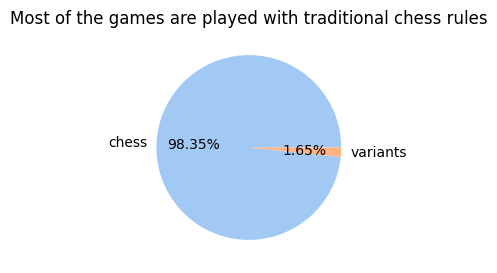

In [1016]:
# Counts games by rule format
gameRules = games["rules"].value_counts()

# Groups small values
treshold = len(games) / 100 # Rules used in less than 1% of games will be grouped in the "Others" category
rulesChartData = gameRules[gameRules >= treshold]
rulesChartData["variants"] = gameRules[gameRules < treshold].sum()

# Draws graph
fig, ax = plt.subplots()
fig.set_figheight(3)
ax.set_title("Most of the games are played with traditional chess rules")
ax.pie(rulesChartData.values, labels = rulesChartData.index.values, 
    colors=pastelColors, autopct='%.2f%%')

plt.show()

As expected, most games are traditional chess games.

Out of curiosity, let's see what's the most played non-traditional format.

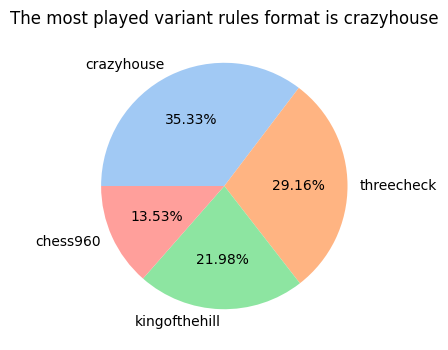

In [1017]:
# Graph for the distribution of variant chess rules
variantRulesChartData = gameRules[gameRules < treshold]

fig, ax = plt.subplots()
fig.set_figheight(4)
ax.set_title("The most played variant rules format is crazyhouse")
ax.pie(variantRulesChartData.values, labels = variantRulesChartData.index.values, 
    colors=pastelColors, autopct='%.2f%%', 
    counterclock=False, startangle=-180)

plt.show()

Given that most of the games are in the traditional format, including games with different rules in our analysis may give us skewed data.

So, we'll remove games with variant rules from our main dataset, and store them in a different dataset to perform separate analysis on them. 

In [1018]:
# Saves variant games in a different dataset
variantGames = games[~(games["rules"] == "chess")]

# Removes variant games from the main dataset\
games = games[games["rules"] == "chess"]

#### Distribution of time formats

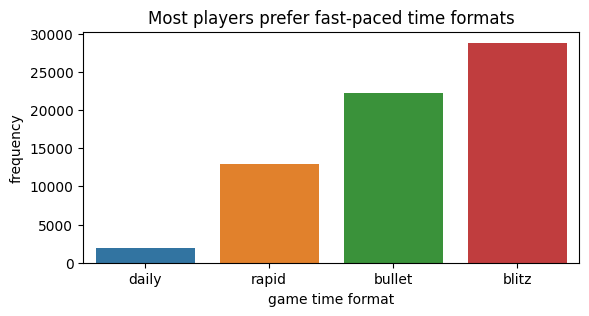

In [1019]:
timeFormatCount = games["time_class"].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()
fig.set_figheight(3)

ax.set_title("Most players prefer fast-paced time formats")
ax.set_xlabel("game time format")
ax.set_ylabel("frequency")
sns.barplot(x=timeFormatCount.index.values, y=timeFormatCount.values, order=timeFormatCount.index.values)
plt.show()

#### Distribution of rated/casual games

An online game can either be rated or not. In rated games, the losing player loses rating points. So, we expect players to be more focused when there are risks involved.

First, let's see how are games distributed.

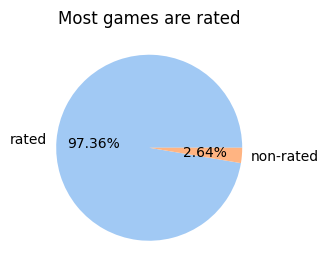

In [1020]:
ratedGamesCount = games["rated"].value_counts()
ratedGamesCount.rename({True: "rated", False: "non-rated"}, inplace=True)

fig, ax = plt.subplots()

fig.set_figwidth(3)
ax.set_title("Most games are rated")
ax.pie(ratedGamesCount.values, labels=ratedGamesCount.index.values, colors=pastelColors, autopct='%.2f%%')

plt.show()

Given that most games are rated, we may consider removing non-rated games from the analysis since they're a different category that may skew our data.

Let's explore further into the issue. Given that the default option in Chess.com is playing rated games, a reason why some players might explicitly set the non-rated game option could be to play with friends that have a higher/lower rating, without having to worry about losing rating. 

Let's see how often do players in non-rated games have a different rating, compared to rated games.

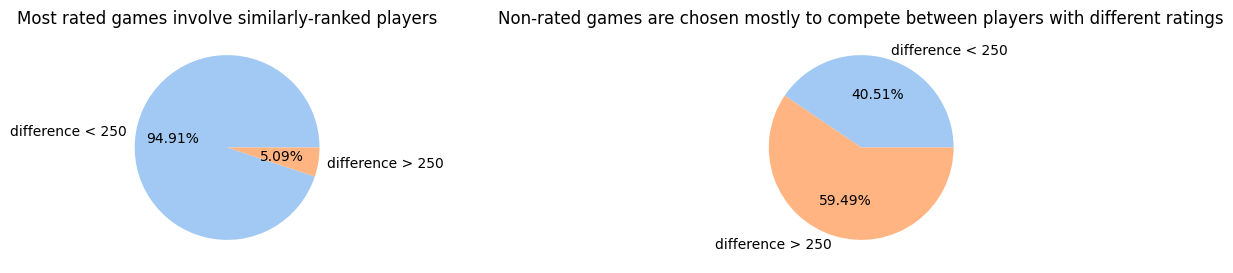

In [1021]:
ratingDifferenceTreshold = 250
games["high_players_rating_difference"] = games["players_rating_difference"].map(lambda difference: True if difference > ratingDifferenceTreshold else False)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(3)

# Rated games graph
ratedGames = games[games["rated"]]
ratedRatingDifferenceCount = ratedGames["high_players_rating_difference"].value_counts().sort_index()
ratedRatingDifferenceCount.rename({False: "difference < " + str(ratingDifferenceTreshold), True: "difference > " + str(ratingDifferenceTreshold)}, inplace=True)

ax1.set_title("Most rated games involve similarly-ranked players")
ax1.pie(ratedRatingDifferenceCount.values, labels=ratedRatingDifferenceCount.index.values, colors=pastelColors, autopct='%.2f%%')

# Non-rated games graph
nonRatedGames = games[~games["rated"]]
nonRatedRatingDifferenceCount = nonRatedGames["high_players_rating_difference"].value_counts().sort_index()
nonRatedRatingDifferenceCount.rename({False: "difference < " + str(ratingDifferenceTreshold), True: "difference > " + str(ratingDifferenceTreshold)}, inplace=True)

ax2.set_title("Non-rated games are chosen mostly to compete between players with different ratings")
ax2.pie(nonRatedRatingDifferenceCount.values, labels=nonRatedRatingDifferenceCount.index.values, colors=pastelColors, autopct='%.2f%%')

plt.show()

Considering that non-rated games compose only 2% of total games, and that the average rating gap between players is way higher (making these games outliers compared to rated games), we can safely remove them from our data.

In [1022]:
games = games[games["rated"]]

#### When did these games happen?

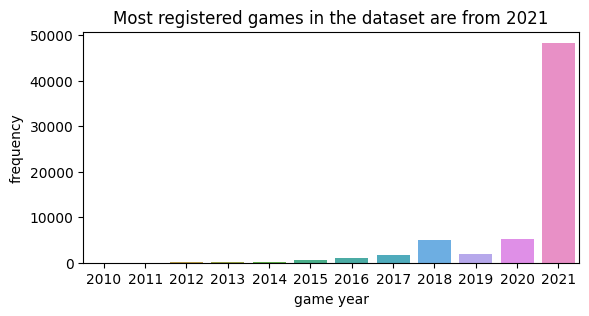

In [1023]:
yearCount = games["game_date"].str[:4].value_counts().sort_index()

fig, ax = plt.subplots()
fig.set_figheight(3)

ax.set_title("Most registered games in the dataset are from 2021")
ax.set_xlabel("game year")
ax.set_ylabel("frequency")
sns.barplot(x=yearCount.index.values, y=yearCount.values)
plt.show()

At first glance, we may think that the chess phenomenon exploded in 2021. While there has indeed been a slight increase (partially due to the Queen's Gambit webseries), a quick internet search tells us that on Chess.com there are milions of games played, not 60.000.

The information in the dataset was probably acquired in 2021, with a few games from previous years found during the data gathering phase.

#### How many players partecipated in these games?

In [1024]:
players = pd.concat([games["white_username"], games["black_username"]]).unique()
print("Number of players in dataset:", len(players))
print("Number of games in dataset: ", games.shape[0])

Number of players in dataset: 54770
Number of games in dataset:  64040


We can see from the numbers that only few players have more than 1 game registered in the dataset. 

So, the dataset is likely a collection of random game samples.

#### How is the rating distributed among players?

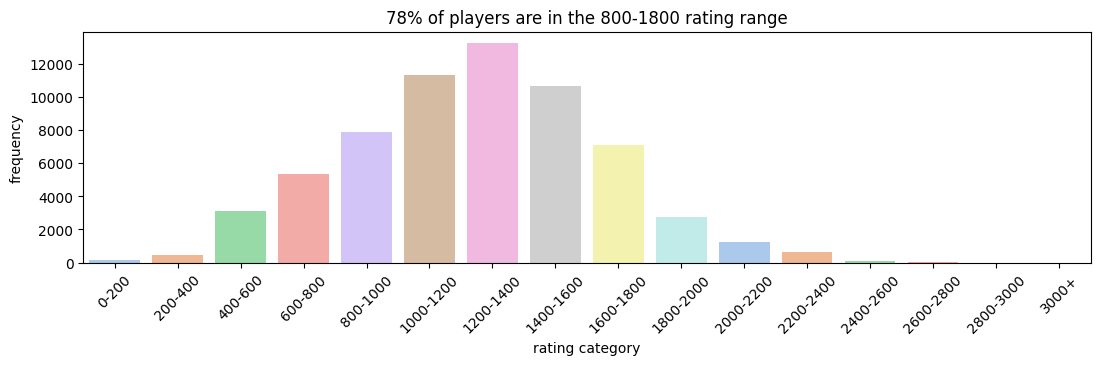

In [1052]:
ratingGroupsCount = transformToRatingClasses(games["players_mean_rating"], 200).value_counts().sort_index()
centralGroups = ratingGroupsCount["800-1000":"1600-1800"]
centralGroupsPerc = str(int(centralGroups.sum() / ratingGroupsCount.sum() * 100)) + "%"

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(13)

ax.set_title(centralGroupsPerc + " of players are in the 800-1800 rating range")
ax.set_xlabel("rating category")
ax.set_ylabel("frequency")
sns.barplot(x=ratingGroupsCount.index.values, y=ratingGroupsCount.values, palette="pastel")
plt.xticks(rotation=45)
plt.show()

We see that there is a small amount of players with high/low rating. 

The matchmaking system of most online games tries to pair people with a similar level of experience if possible. But, if the game doesn't find equally rated players, as the waiting progresses, the algorithms usually tend to gradually increase the acceptable difference in rating difference.

We can presume that players towards the queues of the rating distributions will have move difficulty finding online opponents of their same level, so there might more matches with a high rating difference for low/high rated players.

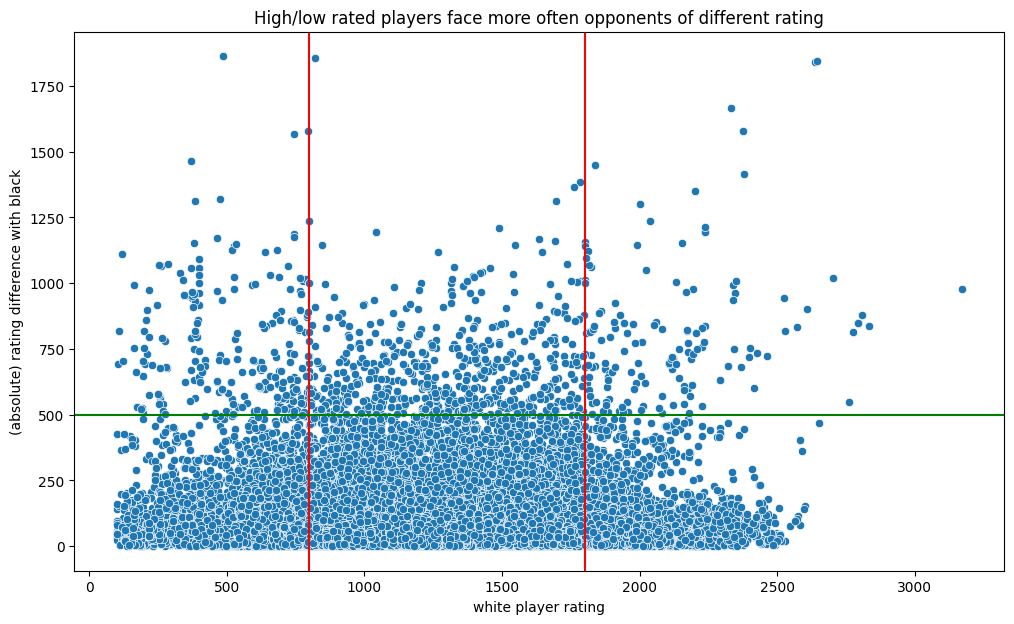

In [1255]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)

ax.set_title("High/low rated players face more often opponents of different rating")
ax.set_xlabel("white player rating")
ax.set_ylabel("(absolute) rating difference with black")

sns.scatterplot(data=games, x="white_rating", y="players_rating_difference")

plt.axvline(800, 0, 1, c="r")
plt.axvline(1800, 0, 1, c="r")
plt.axhline(500, 0, 1, c="g")
plt.show()

The two red lines on the graph enclose the portion of the data per more than 75% is contained (the 800-1800 rating range, as we've seen before). The green line represents a treshold (500 points in rating difference) that serves as a visual aid to notice outliers in matchmaking.

Outside of the two red lines, towards the queues on the x axis, we indeed see that there is a higher number of observations with a great rating discrepancy between players.

Although at first glance this may seem not to have a big impact due to the smaller amount of points in comparison to the center, we have to keep in mind that players towards the queues are less frequent (as we've seen in the previous graph), so it's natural that there are less points than the center. But the relative frequency of these high points in the queues is high.

#### How does white's first move advantage influence games?

In chess literature, it is often said that the white player has a small advantage due to being able to perform the first move, which sets the pace of the game.

Let's see the impact of the first move advantage.

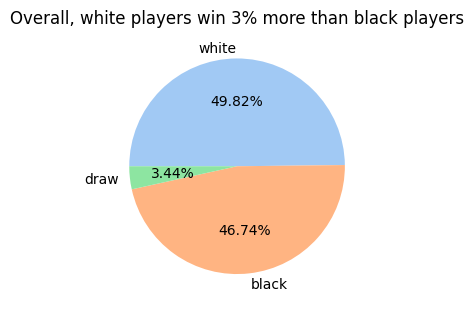

In [1044]:
winnerCount = games["winner"].value_counts().rename({"neither": "draw"})

fig, ax = plt.subplots()
fig.set_figheight(3.5)
ax.set_title("Overall, white players win 3% more than black players")
ax.pie(winnerCount.values, labels=winnerCount.index.values, colors=pastelColors, autopct='%.2f%%', counterclock=False, startangle=-180)

plt.show()

How does this change across different ratings? 

A personal hypotesis is that low rated players lack the experience to fully exploit the small advantage given by moving first. I expect the influence of this advantage to become more significant at higher ratings.

In [1095]:
# Transforms white players' ratings into categorical data
whiteRatingGroups = transformToRatingClasses(games["white_rating"], 200)

# Creates a frequency table
winnersDistribution = pd.crosstab(whiteRatingGroups, games["winner"])
winnersDistribution["total_games"] = winnersDistribution.sum(axis=1)
winnersDistribution["white_advantage"] = winnersDistribution["white"] - winnersDistribution["black"]
winnersDistribution["black"] = (winnersDistribution["black"] / winnersDistribution["total_games"] * 100).round(2).astype(str) + "%"
winnersDistribution["neither"] = (winnersDistribution["neither"] / winnersDistribution["total_games"] * 100).round(2).astype(str) + "%"
winnersDistribution["white"] = (winnersDistribution["white"] / winnersDistribution["total_games"] * 100).round(2).astype(str) + "%"

# Adds information about white players' advantage across rating ranges
winnersDistribution["white_advantage"] = (winnersDistribution["white_advantage"] / winnersDistribution["total_games"] * 100).round(2).astype(str) + "%"
winnersDistribution

winner,black,neither,white,total_games,white_advantage
white_rating,,,,,
0-200,68.79%,4.05%,27.17%,173,-41.62%
200-400,62.54%,2.23%,35.22%,582,-27.32%
400-600,54.0%,2.69%,43.31%,3089,-10.68%
600-800,50.8%,2.99%,46.2%,5344,-4.6%
800-1000,47.9%,3.31%,48.79%,7803,0.88%
1000-1200,47.22%,3.04%,49.74%,11211,2.52%
1200-1400,45.48%,3.35%,51.18%,13326,5.7%
1400-1600,45.73%,3.8%,50.47%,10462,4.74%
1600-1800,44.08%,4.17%,51.74%,7141,7.66%


We can see that, at low rating ranges, the white player actually has a disadvantage in terms of winrates. 

This is probably since inexperienced players make more mistakes, so not only their mistakes overcompensate the advantages obtainable by moving first (if one adopts correct play), but moving first actually becomes an additional risks of making mistakes that the opponent can punish.

As we predicted, at higher ratings, when players start to learn game theory, the advantage of moving first becomes more influent.

We can see that, on the right queue, the advantage becomes really relevant, but the low values in the total column warns are that these are skewed data based on few games. If we only consider games for which we have thousands of observations, we can see a peak value of +13.5% for white's advantage in the 1800-2000 range.

#### What are the most common opening moves?

As we mentioned during the manipulation phase, there are 5 groups of ECO codes, ranging from A to E, that represent opening categories. Further information can be found [here](https://en.wikipedia.org/wiki/Encyclopaedia_of_Chess_Openings).

First, let's see what are the most popular opening categories.

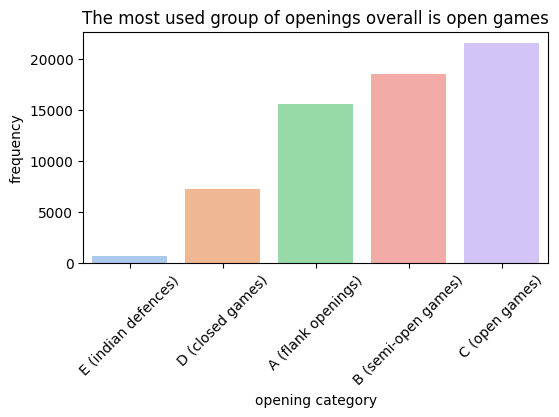

In [1028]:
openingGroupsCount = games["opening_code_group"].value_counts().sort_values(ascending=True)
openingGroupsCount.rename({"A": "A (flank openings)", "B": "B (semi-open games)", "C": "C (open games)", "D": "D (closed games)", "E": "E (indian defences)"}, inplace=True)

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(6)

ax.set_title("The most used group of openings overall is open games")
ax.set_xlabel("opening category")
ax.set_ylabel("frequency")
sns.barplot(x=openingGroupsCount.index.values, y=openingGroupsCount.values, palette="pastel", order=openingGroupsCount.index.values)
plt.xticks(rotation=45)
plt.show()

In [1133]:
playersRatingGroups = transformToRatingClasses(games["players_mean_rating"], 500)

# Calculates frequencies for each opening
openingsDistrib = pd.crosstab(playersRatingGroups, games["opening_code_group"])
num_games = openingsDistrib.sum(axis=1)

# Calculates percentages for each opening
openingsDistrib = pd.crosstab(playersRatingGroups, games["opening_code_group"], normalize="index")
openingsDistrib = (openingsDistrib * 100).round(2).astype(str) + "%"

# Adds the number of observations to the percentages table
openingsDistrib["number_of_games"] = num_games

openingsDistrib

opening_code_group,A,B,C,D,E,number_of_games
players_mean_rating,,,,,,
0-500,35.28%,22.02%,33.93%,8.77%,0.0%,1403
500-1000,24.4%,25.87%,36.06%,13.38%,0.29%,15306
1000-1500,23.97%,28.37%,35.61%,11.08%,0.97%,29803
1500-2000,24.36%,32.58%,30.97%,10.56%,1.53%,15069
2000-2500,25.83%,45.98%,17.8%,7.93%,2.46%,1955
2500-3000,33.33%,44.44%,11.11%,11.11%,0.0%,18


We can see that, although the bar chart with the overall distribution of the openings showed the C group (open games) as the most used, this isn't true at all rating ranges.

High level players actually prefer the A (flank openings) and B (semi-open games) opening groups.

After analyzing the opening groups, now let's explore the specific openings.

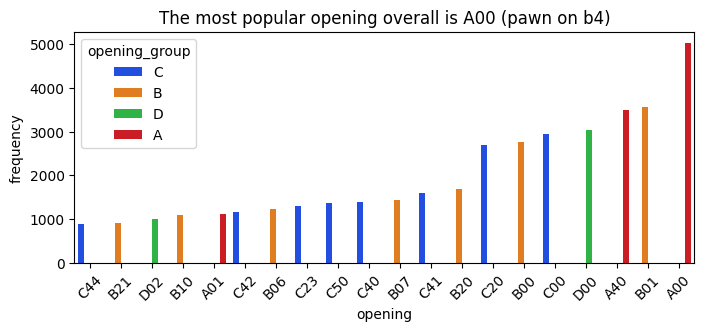

In [1202]:
topOpenings = 20

# Counts the top openings
openingsCount = games["opening_code"].value_counts()
openingsCount = openingsCount[0:topOpenings].sort_values(ascending=True)

# Creates a dataframe with opening, opening-group, count information (to use hue in the graph on opening-group)
openingsCount = openingsCount.reset_index()
openingsCount.rename(columns={"index": "opening", "opening_code": "frequency"}, inplace=True)
openingsCount["opening_group"] = openingsCount["opening"].str[:1]

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(8)

ax.set_title("The most popular opening overall is A00 (pawn on b4)")
sns.barplot(data=openingsCount, x="opening", y="frequency", hue="opening_group", palette="bright")
plt.xticks(rotation=45)
plt.show()

Although the overall data on opening groups show a preferences for C-group openings (open games), we can see that, out of the top5 openings in terms of popularity, two of them are A-group (flank openings), with the most used being opening with the white pawn in front of the left knight, into the b4 square, starting a flank (lateral) approach from one side of the board.

#### What are the most common game results? What influences them?

In [1205]:
# Defines a function, to reuse it later in the analysis
def getGameResultsDf(games):
    # Counts the top openings
    gameResultsCount = games["result_type"].value_counts().sort_values(ascending=True)

    # Creates a dataframe with opening, opening-group, count information (to use hue in the graph on opening-group)
    gameResultsCount = gameResultsCount.reset_index()
    gameResultsCount.rename(columns={"index": "result", "result_type": "frequency"}, inplace=True)
    # gameResultsCount["result_type"] = 

    typesOfDraw = ["repetition", "timevsinsufficient", "stalemate", "insufficient", "agreed", "50move"]
    gameResultsCount["result type"] = gameResultsCount["result"].apply(lambda result: "draw" if result in typesOfDraw else "victory")

    return gameResultsCount

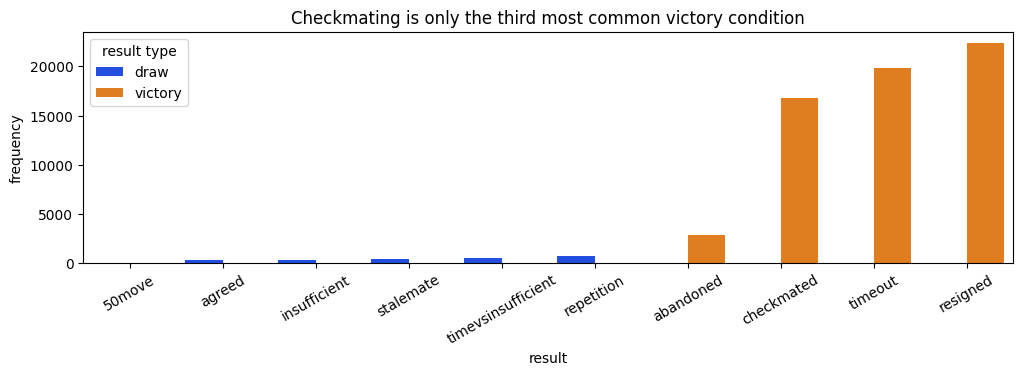

In [1206]:
gameResultsCount = getGameResultsDf(games)
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)

ax.set_title("Checkmating is only the third most common victory condition")
sns.barplot(data=gameResultsCount, x="result", y="frequency", hue="result type", palette="bright")
plt.xticks(rotation=30)
plt.show()

I would've expected more victories by timeout in fast-paced formats. Seeing timeout as a higher victory condition overall is an interesting factor we might want to dig deeper into.

In [1230]:
resultTableTime = pd.crosstab(games["time_class"], games["result_type"], normalize="index")
(resultTableTime * 100).round(2).astype(str) + "%"

result_type,50move,abandoned,agreed,checkmated,insufficient,repetition,resigned,stalemate,timeout,timevsinsufficient
time_class,,,,,,,,,,
blitz,0.02%,5.48%,0.45%,27.08%,0.67%,1.33%,43.34%,0.83%,20.14%,0.66%
bullet,0.0%,1.29%,0.04%,24.75%,0.15%,0.47%,15.98%,0.49%,55.76%,1.07%
daily,0.0%,0.0%,1.52%,12.26%,0.22%,0.51%,28.74%,0.06%,56.58%,0.11%
rapid,0.0%,7.89%,0.95%,29.28%,0.82%,1.65%,50.38%,0.81%,7.89%,0.34%


By analyzing the game result types in light of the time format, we can make some observations:
- players in daily games (which is a per-move format that can last even weeks) are more prone to agreeing to a draw, to let a game that is clearly one-sided end without having to wait days
- we see few resignations in bullet games, due to their quick nature, and a higher number of resignation in blitz (3/5 min. games) and rapid (10/30 min. games); this is probably due to players in losing positions growing frustrated and wanting to start over with a new game
- obviously, the number of timeouts in quick bullet games (1/2 min. games) is higher than in slower formats like blitz and rapid
- surprisingly, there is a high amount of timeouts in daily games; this is probably due to players starting many daily games simultaneously and then forgetting to follow them all (a daily game allow the players to exit from the game after having done their move)

In [1231]:
resultTableElo = pd.crosstab(transformToRatingClasses(games["players_mean_rating"], 500), games["result_type"], normalize="index")
(resultTableElo * 100).round(2).astype(str) + "%"

result_type,50move,abandoned,agreed,checkmated,insufficient,repetition,resigned,stalemate,timeout,timevsinsufficient
players_mean_rating,,,,,,,,,,
0-500,0.0%,14.93%,0.69%,22.44%,0.21%,0.34%,32.83%,0.89%,27.12%,0.55%
500-1000,0.0%,6.64%,0.42%,28.2%,0.38%,0.69%,29.91%,1.07%,32.23%,0.46%
1000-1500,0.01%,3.76%,0.41%,27.67%,0.5%,1.11%,34.22%,0.62%,30.96%,0.73%
1500-2000,0.01%,2.64%,0.44%,22.6%,0.67%,1.42%,40.96%,0.44%,29.89%,0.93%
2000-2500,0.05%,1.28%,0.66%,21.84%,0.56%,1.59%,41.99%,0.36%,30.54%,1.13%
2500-3000,0.0%,0.0%,0.0%,11.11%,0.0%,0.0%,27.78%,5.56%,55.56%,0.0%


By analyzing how result types are linked to players ratings, we can observe that:
- higher level players resign more often; probably because they can judge when a position is lost, and they know their opponent is unlikely to commit mistakes
- the checkmate frequency at high levels is lower due to the higher resigning frequency
- abandoning games (giving up by leaving the game open without moving until you lose by timeout, to annoy the opponent by not allowing him to play) becomes less frequent at higher ratings; this behaviour is ususally performed out of frustration when losing; experienced players are more accustomed to losing

#### What are the factors that influence the points advantage?

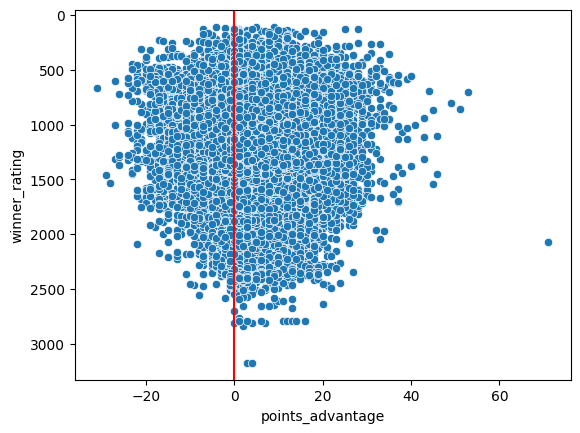

In [1242]:
fig, ax = plt.subplots()
sns.scatterplot(x=games["points_advantage"], y=games["winner_rating"])
plt.axvline(0, 0, 1, c="r") # x = 0, yStart = 0, yEnd = 1 (100%)
plt.show()

In [1234]:
x = games[games["points_advantage"]>50]